In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
pwd

'd:\\Study\\python\\Iris prediction'

In [3]:
df = pd.read_csv('d:\\Study\\python\\Iris prediction\\Iris.csv')

In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data=df.groupby('Species')


In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data['Species'].value_counts()

Species          Species        
Iris-setosa      Iris-setosa        50
Iris-versicolor  Iris-versicolor    50
Iris-virginica   Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x19ddc003370>,
 'caps': [<matplotlib.lines.Line2D at 0x19ddc0038b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ddc0030d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ddc003df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ddc0640d0>],
 'means': []}

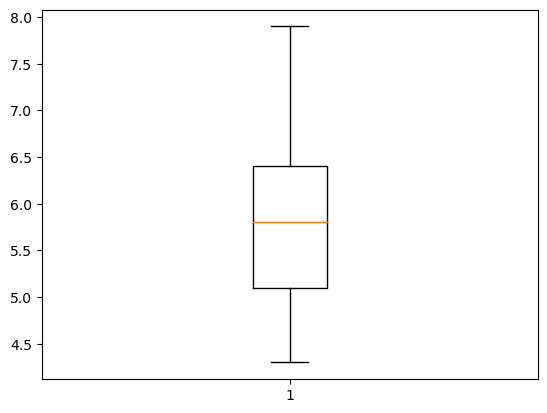

In [12]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ddc11ae60>,
 'caps': [<matplotlib.lines.Line2D at 0x19ddc11b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ddc11abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ddc11b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ddc11ba60>],
 'means': []}

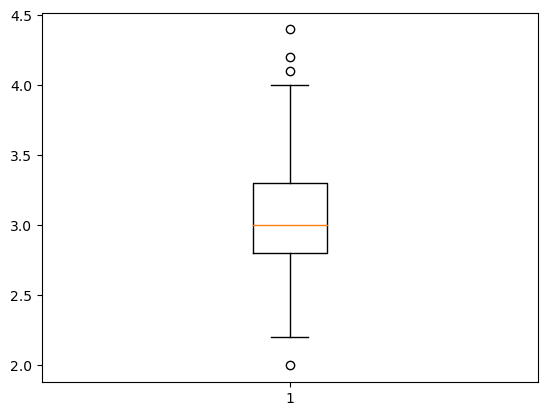

In [13]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ddc19dc60>,
 'caps': [<matplotlib.lines.Line2D at 0x19ddc19e1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ddc19d9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ddc19e6e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ddc171bd0>],
 'means': []}

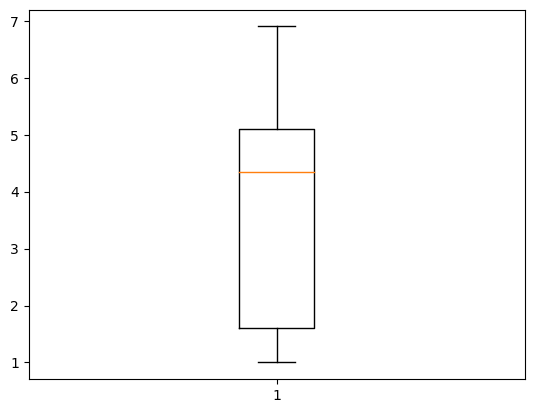

In [14]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ddc218f40>,
 'caps': [<matplotlib.lines.Line2D at 0x19ddc219480>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ddc218ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ddc2199c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ddc219c60>],
 'means': []}

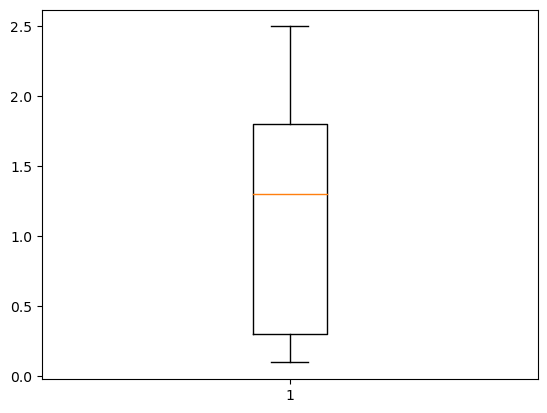

In [15]:
plt.boxplot(df['PetalWidthCm'])

C:\Users\ishit\AppData\Local\Temp\ipykernel_22648\2742881516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

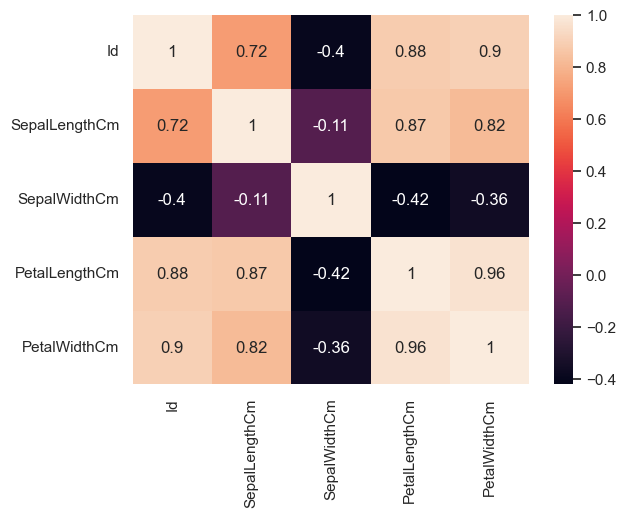

In [17]:
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot = True)

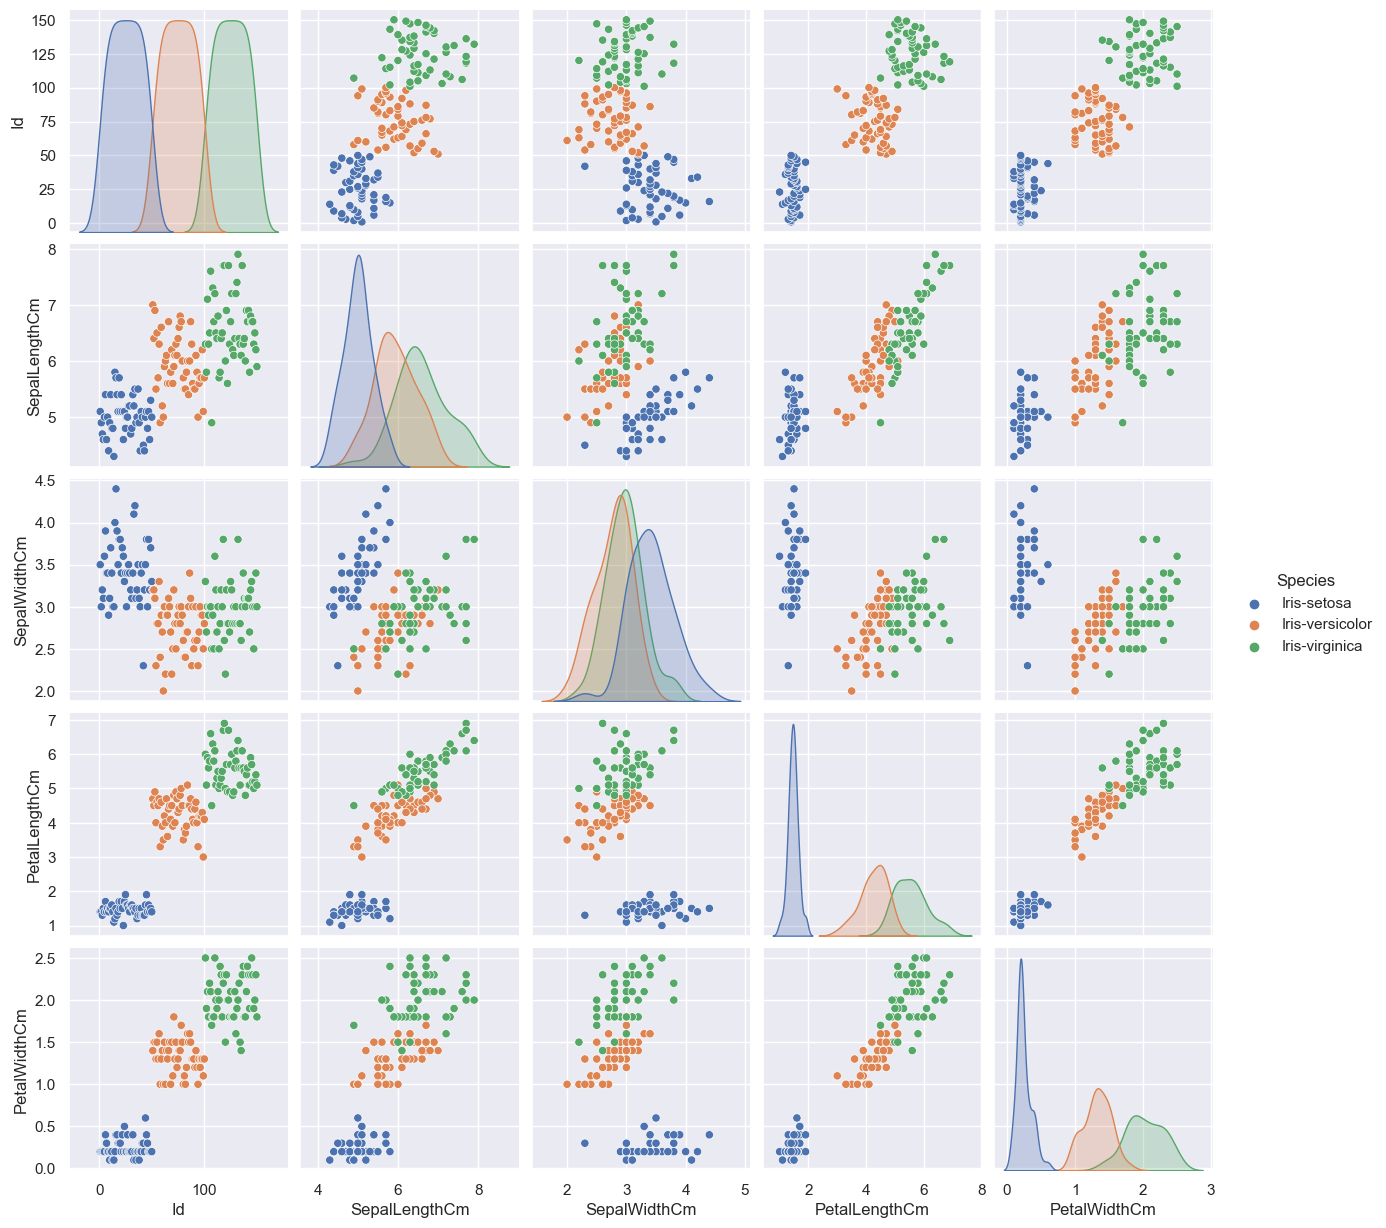

In [18]:
sns.pairplot(df, hue = "Species")

In [19]:
df.drop('Id',axis=1,inplace=True)
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
df.Species=[sp[i] for i in df.Species]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [20]:
X=df.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=df.iloc[:,4]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
model=LinearRegression()

In [24]:
model.fit(X,y)

LinearRegression()

In [25]:
model.score(X,y).round(4)

0.9304

In [26]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [27]:
model.intercept_

1.1920839948281419

In [28]:
y_pred=model.predict(X_test)

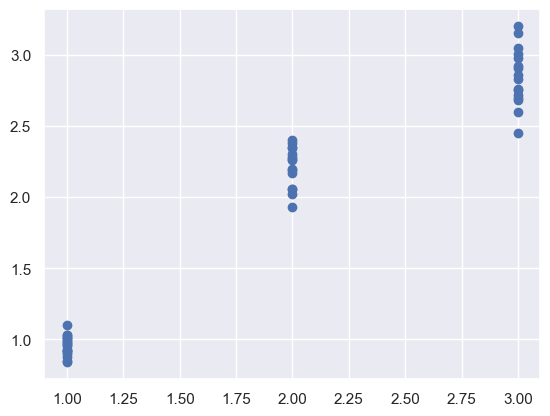

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test , y_pred)

C:\Users\ishit\AppData\Local\Temp\ipykernel_22648\3589273082.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_pred), bins = 50)


<Axes: ylabel='Density'>

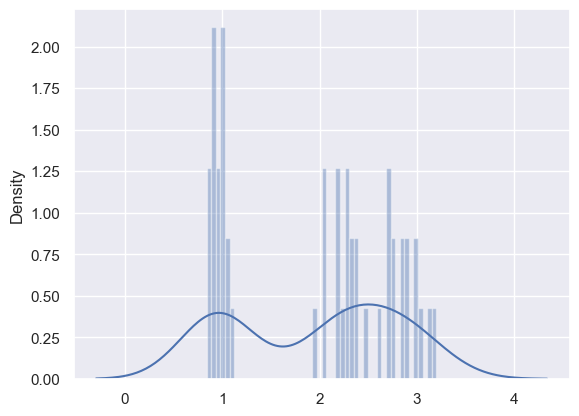

In [30]:
import seaborn as sns
sns.distplot((y_pred), bins = 50)

In [31]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
